In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [4]:
df_outcomes_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Outcomes')
df_donor_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_referral_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='ReferralDetails')
DataD_df=pd.read_excel('DataDictionary.xlsx')


1.Using numpy functions, multiply the following arrays using matrix multiplication.


In [6]:
#1.Using numpy functions, multiply the following arrays using matrix multiplication.
 #a=np.arange(4).reshape(2,2)
# b=np.arange(6).reshape(3,2)
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)
b_trps=np.transpose(b)
print(a)
print(b_trps)
c=a @ b_trps
print(c)

[[0 1]
 [2 3]]
[[0 2 4]
 [1 3 5]]
[[ 1  3  5]
 [ 3 13 23]]


4.Who is the oldest patient who died of drug overdose?

In [8]:
#4.Who is the oldest patient who died of drug overdose?
patient_donor=df_donor_details['PatientID']
age_donor=df_donor_details['age']
causeofdeath_donor=df_donor_details['causeofdeath']
mechanism_death_donor=df_donor_details['mechanism_of_death']
died_donor={
    "patien_ID":patient_donor,
    "age_donor":age_donor,
    "cd_donor":causeofdeath_donor
}
data_donor=pd.DataFrame(died_donor)
#data_donor_diet=data_donor[(data_donor['cd_donor']=="Overdose") | (data_donor['md_donor']=="Overdose")]
data_donor_overdose=data_donor[(data_donor['cd_donor']=="Overdose")]
data_donor_oldPatient=data_donor_overdose.loc[data_donor_overdose['age_donor'].idxmax()]
data_donor_oldPatient

patien_ID    OPO4_P442864
age_donor            80.0
cd_donor         Overdose
Name: 68688, dtype: object

5.What is the average age of patients with renal failure?

In [10]:
#5.What is the average age of patients with renal failure?
#df_outcomes_details
#df_outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df
renal_failure_List=merged_df[(merged_df['outcome_kidney_left']=="Transplanted") | (merged_df['outcome_kidney_right']=="Transplanted")]
renal_failure_List
renal_failure_List.groupby(['PatientID'])['age'].mean()




PatientID
OPO1_P100082    23.0
OPO1_P100320    10.0
OPO1_P100538    19.0
OPO1_P101409    13.0
OPO1_P101470    24.0
                ... 
OPO6_P991622    47.0
OPO6_P992125    31.0
OPO6_P994456    44.0
OPO6_P996619    62.0
OPO6_P997730    35.0
Name: age, Length: 7476, dtype: float64

6.List all male donors over 75 who had organs recovered for research

In [21]:
#6.List all male donors over 75 who had organs recovered for research
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df_recovered=merged_df[((merged_df['outcome_heart']== "Recovered for Research") | (merged_df['outcome_liver']== "Recovered for Research") | (merged_df['outcome_kidney_left']== "Recovered for Research") | (merged_df['outcome_kidney_right']== "Recovered for Research") | (merged_df['outcome_lung_left']== "Recovered for Research") | (merged_df['outcome_lung_right']== "Recovered for Research") | (merged_df['outcome_intestine']== "Recovered for Research") | (merged_df['outcome_pancreas']== "Recovered for Research") )]
merged_df_recovered_patients=merged_df_recovered[(merged_df_recovered['age']>75) & (merged_df_recovered['gender']=="M")]
merged_df_recovered_patients

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death,outcome_heart,outcome_liver,outcome_kidney_left,outcome_kidney_right,outcome_lung_left,outcome_lung_right,outcome_intestine,outcome_pancreas
13815,OPO1_P463597,76.0,M,Hispanic,cerebrovascular accident,Stroke,1,NaT,2033-07-11 12:29:00,NaN,Transplanted,NaN,NaN,NaN,Recovered for Research,NaN,NaN
35962,OPO3_P862019,83.0,M,White,Anoxia,Cardiovascular,1,NaT,2035-12-10 17:50:00,NaN,Transplanted,Transplanted,Transplanted,Recovered for Research,Recovered for Research,NaN,NaN
45616,OPO4_P199498,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-06-16 07:50:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN
47887,OPO4_P877754,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-11-19 13:50:00,NaN,Transplanted,Recovered for Research,NaN,Recovered for Research,Recovered for Research,NaN,NaN
50813,OPO4_P92279,76.0,M,Hispanic,Head Trauma,Blunt Injury,1,NaT,2031-10-25 11:27:00,NaN,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN,NaN
51321,OPO4_P628770,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2031-02-14 11:20:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN
52429,OPO4_P908004,76.0,M,White,cerebrovascular accident,Stroke,1,NaT,2033-01-16 13:50:00,Recovered for Research,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
60562,OPO4_P435716,78.0,M,Hispanic,Anoxia,Cardiovascular,1,NaT,2032-11-14 16:03:00,NaN,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
64894,OPO4_P487002,79.0,M,White,cerebrovascular accident,Stroke,1,NaT,2034-02-27 11:41:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research
81716,OPO5_P287897,79.0,M,Black,Head Trauma,Blunt Injury,1,2032-09-15 12:56:00,2032-09-14 20:34:00,Recovered for Research,Transplanted,NaN,NaN,NaN,NaN,NaN,NaN


7.Make Patient ID as index to the table.

In [23]:
#7.Make Patient ID as index to the table.
subdf_donor_details=df_donor_details['PatientID']
column_name=['age','gender','race','causeofdeath','mechanism_of_death','brain_death','time_asystole','time_brain_death']
subdf_donor_details
s1=pd.DataFrame(data=df_donor_details,index=subdf_donor_details,columns=column_name)
s1

,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
PatientID,,,,,,,,
OPO1_P155959,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P297347,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P399316,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P246407,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P187209,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...
OPO6_P54946,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P630991,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P8748,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 Access any one cause of death using the donors age using the get() function

In [25]:
#8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 #Access any one cause of death using the donors age using the get() function
dic={
    "PatientID":['OPO1_P155959','OPO1_P297347','OPO1_P399316','OPO1_P246407','OPO1_P187209'],
    "age":[54,78,57,78,70],
    "causeofdeath":['Unknown','Unknown','Anoxia','cerebrovascular accident','Unknown']
}
print(dic)


{'PatientID': ['OPO1_P155959', 'OPO1_P297347', 'OPO1_P399316', 'OPO1_P246407', 'OPO1_P187209'], 'age': [54, 78, 57, 78, 70], 'causeofdeath': ['Unknown', 'Unknown', 'Anoxia', 'cerebrovascular accident', 'Unknown']}


In [27]:
#8.Access any one cause of death using the donors age using the get() function

age=dic['age']
causeofdeath=dic['causeofdeath']
data=dict(zip(age,causeofdeath))
#data
print(data.get(78))

cerebrovascular accident


10.Create a bar chart showing the number of donors by procured year. 
Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

In [ ]:
#10.Create a bar chart showing the number of donors by procured year. 
#Add hatching to the bars using the set_hatch() method, and exclude any outlier years.
merged_don_ref_df=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='left')
#merged_don_ref_df

font1={'family':'self','color':'blue','size':20}
font2={'family':'self','color':'red','size':10}

plt.xlabel("PatientID",fontdict=font2,loc="right")
plt.ylabel("time_procured",fontdict=font2,loc="bottom")


plt.figure(figsize=(20,8))

#fig, ax = plt.subplots()

plt.bar(merged_don_ref_df['PatientID'],merged_don_ref_df['time_procured'])

In [ ]:
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()

In [ ]:
plt.plot()

12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.

In [29]:
#12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.
df_donor_details.loc[1001:2001,['race','time_asystole','PatientID']]


,race,time_asystole,PatientID
1001,White,2034-03-28 16:47:00,OPO1_P124711
1002,Hispanic,NaT,OPO1_P934782
1003,White,2034-01-19 12:00:00,OPO1_P496267
1004,Hispanic,2032-01-19 18:49:00,OPO1_P962984
1005,Hispanic,2036-02-05 18:31:00,OPO1_P725315
...,...,...,...
1997,Hispanic,2037-05-19 23:10:00,OPO1_P136906
1998,Hispanic,NaT,OPO1_P966799
1999,White,2034-11-20 21:21:00,OPO1_P636889
2000,Hispanic,2034-02-04 15:00:00,OPO1_P154285


13.np.arange(1,31).reshape(6,5)
    1. Find array slicing to get the elements 1,2,8,30. 
    2. When the value is less than 9, print as 0,else print 99

In [31]:
#13.np.arange(1,31).reshape(6,5)
   # 1. Find array slicing to get the elements 1,2,8,30. 
   # 2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
arr1
print(arr1[0:1,0:2])
print(arr1[0,0])
print(arr1[0,1])
print(arr1[1,2])
print(arr1[5,4])




[[1 2]]
1
2
8
30


In [33]:
  # 13.2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
newarr=np.where(arr1<9,0,99)
newarr

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99]])

14.Create subplots for the following data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
using an object-oriented approach, and arrange the subplots in a 2x2 grid layout

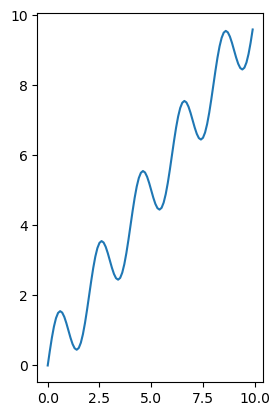

In [35]:
#14.Create subplots for the following data
#x = np.arange(0, 10, 0.1)
#y = np.sin(np.pi * x) + x 
#using an object-oriented approach, and arrange the subplots in a 2x2 grid layout
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
plt.subplot(1,2,1)
plt.plot(x,y)